# Linear Regression Using Sklearn

## Data Generation

In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
a=2
b=3
X=np.linspace(-10, 10 ,100)
Y_noisy=a*X+b+0.9*np.random.normal(0,100, 100)
X.shape, Y_noisy.shape

((100,), (100,))

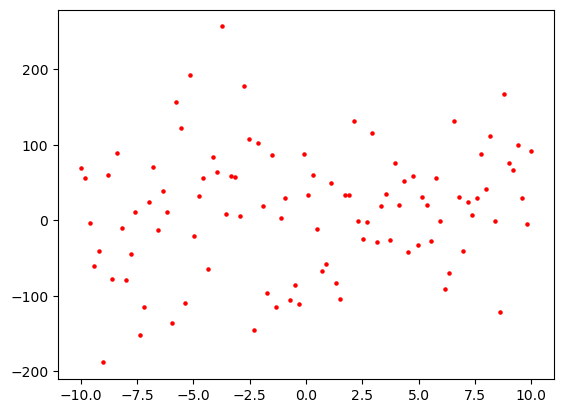

In [3]:
plt.scatter(X, Y_noisy, c='r', s=5)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
X=X.reshape(100, 1)
# Y_noisy=Y_noisy(100, 1)

In [5]:
model=LinearRegression()
model.fit(X, Y_noisy)


LinearRegression()

In [6]:
model.coef_, a

(array([1.94055675]), 2)

In [7]:
model.intercept_, b

(13.418887804794801, 3)

In [8]:
test_X=np.array([[6],[7]])
test_X.shape

(2, 1)

In [9]:
y_pred=model.predict(test_X)

In [10]:
Y=a*X+b
Y_predict=model.coef_*X+model.intercept_

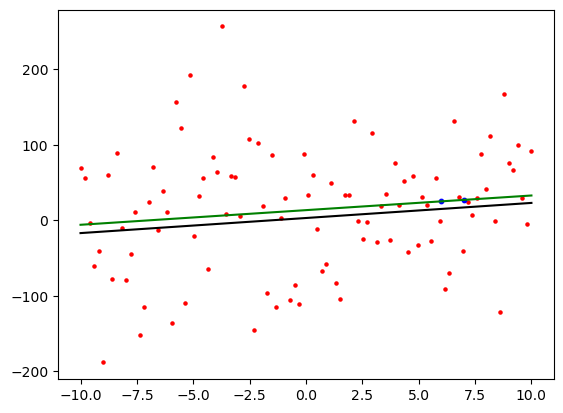

In [11]:
plt.scatter(X, Y_noisy, c='r', s=5)
plt.plot(X, Y, c='k')
plt.scatter(test_X, y_pred, c='b', s=10)
plt.plot(X, Y_predict, c='g')
plt.show()

## Exercise
Perform Linear Regression on Salary Vs years of experience
Data : https://www.kaggle.com/search?q=Years+of+experience+and+Salary+dataset using sklearn.

(a) Plot data

(b) Predicted Line

(c) plot prediction given value of years of service.

In [12]:
import pandas as pd
df=pd.read_csv('data/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
X=df['YearsExperience'].values
# X=X.reshape(30,1)
Y=df['Salary'].values
Y_noisy=Y

In [14]:
X.shape

(30,)

In [15]:
from sklearn.linear_model import LinearRegression
X=X.reshape(30,1)
# Y_noisy=Y_noisy(100, 1)

model=LinearRegression()
model.fit(X, Y_noisy)

LinearRegression()

In [16]:
model.coef_, model.intercept_

(array([9449.96232146]), 25792.20019866871)

In [17]:
new_data=np.array([[15], [2.5]])
y_pred=model.predict(new_data)

In [18]:
y_pred

array([167541.63502049,  49417.10600231])

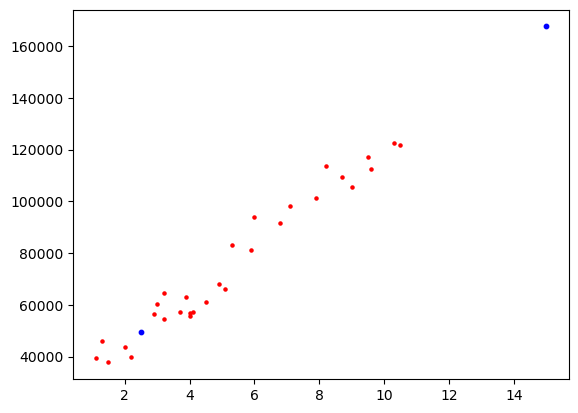

In [19]:
plt.scatter(X, Y_noisy, c='r', s=5)
# plt.plot(X, Y, c='k')
plt.scatter(new_data, y_pred, c='b', s=10)
# plt.plot(X, Y_predict, c='g')
plt.show()

# Multiple independent and single dependent

## Boston House price Prediction
1. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

2. INDUS: proportion of non-retail business acres per town

3. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

4. NOX: nitric oxides concentration (parts per 10 million)https://archive.ics.uci.edu/ml/datasets/Housing

5. RM: average number of rooms per dwelling

6. AGE: proportion of owner-occupied units built prior to 1940

7. DIS: weighted distances to ﬁve Boston employment centers

8. RAD: index of accessibility to radial highways

9. TAX: full-value property-tax rate per $10,000

10. PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population

11. MEDV: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units

## Dataset

In [20]:
import numpy as np
from sklearn.datasets import fetch_openml

In [21]:
boston = fetch_openml(name='boston', version=1, as_frame=True)
boston.data

C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [22]:
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [23]:
df=boston.data.copy()
df['Price']=boston.target
df
boston.feature_names
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [24]:
df.describe()
df[df.isnull().any(axis=1)]
corr=df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


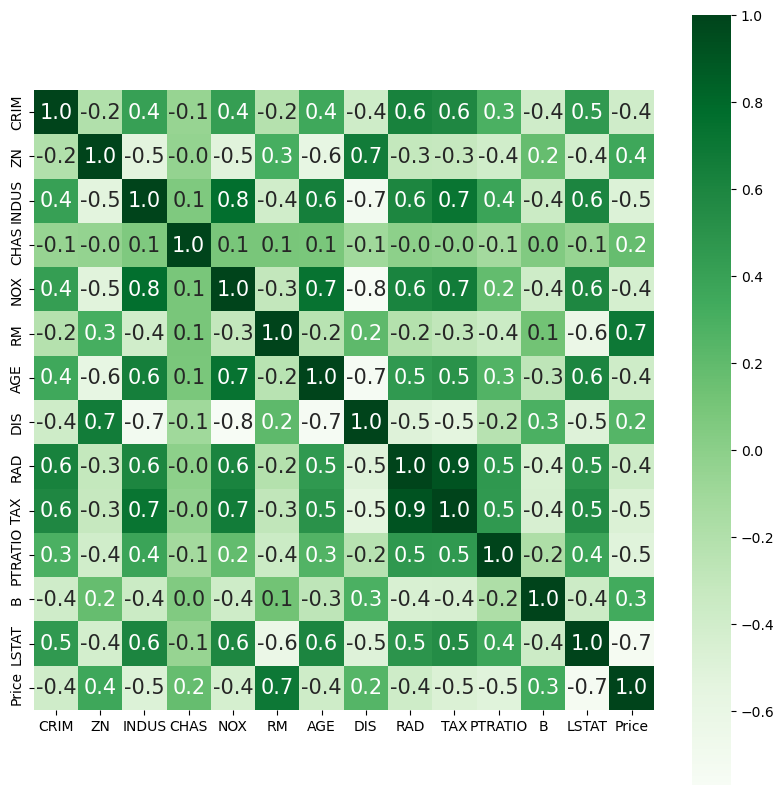

In [25]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='0.1f', cmap='Greens',annot=True, annot_kws={'size':15})
plt.show()

In [26]:
X=boston.data
Y=boston.target


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=4)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((354, 13), (152, 13), (354,), (152,))

In [28]:
from sklearn.linear_model import LinearRegression
model_boston=LinearRegression()
model_boston.fit(X_train, Y_train)
model_boston.coef_


array([-1.22569795e-01,  5.56776996e-02, -8.83428230e-03,  4.69344849e+00,
       -1.44357828e+01,  3.28008033e+00, -3.44778157e-03, -1.55214419e+00,
        3.26249618e-01, -1.40665500e-02, -8.03274915e-01,  9.35368715e-03,
       -5.23477529e-01])

In [29]:
import pandas as pd
Coff=pd.DataFrame([X_train.columns, model_boston.coef_]).T
Coff


,0,1
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


In [30]:

model_boston.intercept_

36.35704137659505

In [31]:
X_new=np.array([[0.00632,	38.0,	5.31,	1,	0.508,9.575,	45.2,	4.0900,	1,	296.0,	15.3,	396.90,	4.98]])
model_boston.predict(X_new)
Y_predict=model_boston.predict(X_test.values)


C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
from sklearn import metrics
metrics.mean_squared_error(Y_test, Y_predict)
metrics.mean_absolute_error(Y_test, Y_predict)
np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))

5.4821522513629795

In [33]:
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn.datasets import fetch_california_housing
california_housing=fetch_california_housing(as_frame=True)
df=california_housing.data.copy()
df['Price']=california_housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [34]:
import sklearn
sklearn.__version__

'1.3.0'

In [35]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [36]:
df=california_housing.data.copy()
df['Price']=california_housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [37]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [38]:
# df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [39]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [40]:
corr=df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


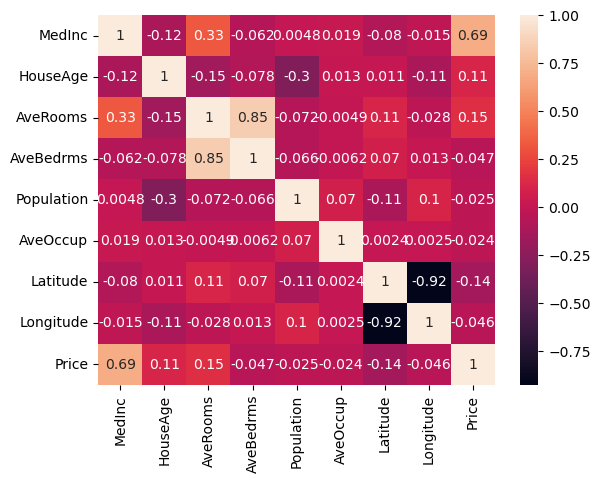

In [41]:
sns.heatmap(corr, annot=True)
plt.show()

In [42]:
X=california_housing.data
# X.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [43]:
X_train, X_test, Y_train, Y_test=train_test_split(X,california_housing.target, test_size=0.3, random_state=14)

In [44]:
model_california_housing=LinearRegression()
model_california_housing.fit(X_train, Y_train)

LinearRegression()

In [45]:
model_california_housing.coef_

array([ 4.37409777e-01,  9.42484412e-03, -1.03463094e-01,  6.27687940e-01,
       -5.91041069e-06, -7.50061595e-03, -4.25968515e-01, -4.39737152e-01])

In [46]:
y_pred=model_california_housing.predict(X_test)

In [47]:
metrics.mean_squared_error(Y_test, y_pred)

0.5287831440617796

In [48]:
metrics.mean_absolute_error(Y_test, y_pred)

0.5295100785137187

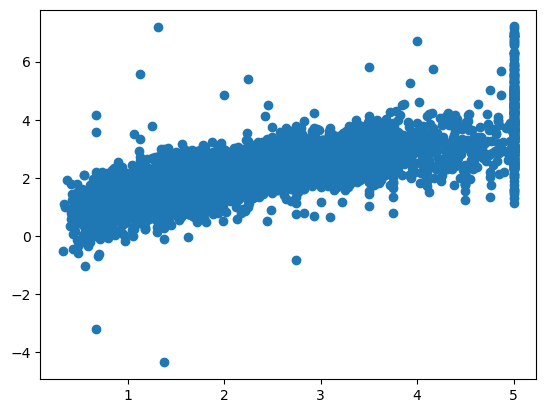

In [49]:
plt.scatter(Y_test, y_pred)

# Multiple independent and single independent

In [50]:
import numpy as np
X=np.linspace(-10,10,100)
y1=2*X+3+0.5*np.random.normal(0,10,100)
y2=12*X+13+0.7*np.random.normal(0,10,100)
y3=42*X+23+0.9*np.random.normal(0,10,100)

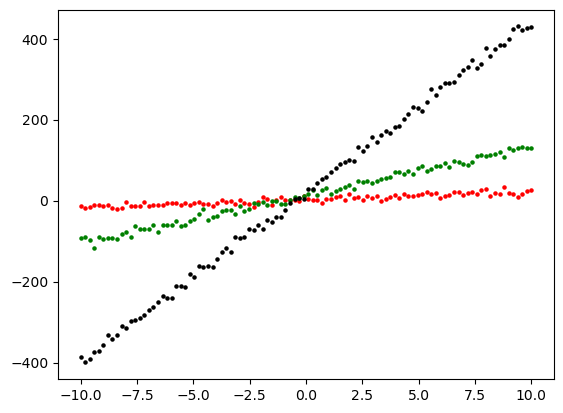

In [51]:
plt.scatter(X, y1, c='r', s=5)
plt.scatter(X, y2, c='g', s=5)
plt.scatter(X, y3, c='k', s=5)

In [52]:
data=pd.DataFrame({'X':X, 'Y1':y1, 'Y2':y2, 'Y3':y3})
data.head()

,X,Y1,Y2,Y3
0,-10.000000,-13.116786,-93.013157,-386.208466
1,-9.797980,-17.785493,-90.809801,-399.942633
2,-9.595960,-15.790381,-98.533131,-391.502984
3,-9.393939,-9.897783,-117.717880,-373.507272
4,-9.191919,-11.305355,-89.472702,-372.686850


In [53]:
X=data[['X']]
y=data[['Y1','Y2','Y3']]

In [54]:
model_lr=LinearRegression()
model_lr.fit(X, y)

LinearRegression()

In [55]:
model_lr.coef_

array([[ 1.97584885],
       [11.98639457],
       [41.96706922]])

In [56]:
model_lr.predict([[0.8]])

C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 4.53786258, 23.47743893, 55.87603703]])

# Multiple dependent and Multiple independent

In [57]:
import numpy as np
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
X3=np.linspace(-10,10,100)

y1=2*X1+5*X2-3*X3+3+0.5*np.random.normal(0,10,100)
y2=12*X1+15*X2+13*X3+13+0.7*np.random.normal(0,10,100)
y3=-22*X1-25*X2+30*X3+23+0.9*np.random.normal(0,10,100)

In [58]:
data=pd.DataFrame({'X1':X1,'X2':X2,'X3':X3, 'Y1':y1, 'Y2':y2, 'Y3':y3})
data.head()

,X1,X2,X3,Y1,Y2,Y3
0,-10.000000,-10.000000,-10.000000,-33.519397,-397.856202,178.744116
1,-9.797980,-9.797980,-9.797980,-38.714254,-373.430157,186.984779
2,-9.595960,-9.595960,-9.595960,-29.279589,-375.791467,176.522720
3,-9.393939,-9.393939,-9.393939,-36.928409,-374.755631,184.026262
4,-9.191919,-9.191919,-9.191919,-40.812370,-351.046203,161.101457


In [59]:
X=data[['X1','X2','X3']]
y=data[['Y1','Y2','Y3']]

In [60]:
model_m_m=LinearRegression()
model_m_m.fit(X,y)

LinearRegression()

In [61]:
model_m_m.coef_

array([[ 1.34541529,  1.34541529,  1.34541529],
       [13.38070955, 13.38070955, 13.38070955],
       [-5.59831684, -5.59831684, -5.59831684]])

In [62]:
new_data=np.array([[0.3, 4.5, 1.6]])
model_m_m.predict(new_data)

C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 11.26659565,  98.53394407, -14.17439511]])